# **Image Augmentation**

### **Brief overview**

<font color='green'>In order to increase the size of the dataset *(number of images)* the methodology employed to perform this task is known as image augmentation. There are numerous problems which have less available dataset. However, to achieve considerable results, one needs to have more images in the dataset. More images would help enhance the training of the various Deep learning models by increasing the diverseness of the images and thereby helping in significantly improving the results.\
In other words, augmentation increases the number of images thereby increasing the dataset for training purposes.</font> \
***



<font color='orange'>*1. Mounting of the drive* </font>



In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [49]:
%pwd

'/content/drive/MyDrive/CSE705'

In [50]:
!ls '/content/drive/MyDrive/CSE705'

Landscape-Color.jpg  yash_saini_Image_augmentation.ipynb


---

<font color='orange'>*2. Fixing the directory*</font>



In [51]:
cd '/content/drive/MyDrive/CSE705'

/content/drive/MyDrive/CSE705


In [52]:
%pwd

'/content/drive/MyDrive/CSE705'

---

<font color='orange'>*3. Importing the necessary libraries*</font>



In [53]:
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
torch.manual_seed(10)

---

<font color='orange'>*4. Open the sample image*</font>



In [54]:
image_sample=Image.open("./Landscape-Color.jpg")

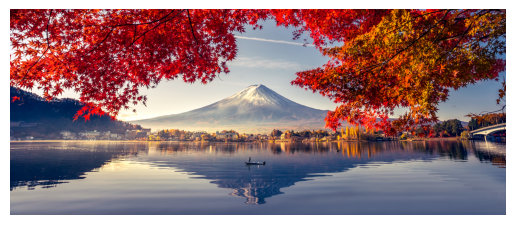

In [55]:
plt.imshow(image_sample)
plt.axis('off')
plt.show()

---

### **Pros of Image Augmentation**
\
<font color='green'>
a) Image augmentation increases the training corpus which helps to prevent the under-performing of the models.

b) The images generated from augmentation increase the dataset number of the images which are hard to obtain. For instance, a person's palmprint images. 
</font> 

***

### **Cons of Image Augmentation**
\
<font color='green'>
a) Image augmentation requires additional work which can be effort taking and may take alot of time.

b) Sometimes the performance of a model is degraded as the augmentation is increased manifold. Therefore, one must keep a watch on the performance of the model.
</font>

***



### **Purpose of the technique & augmentation techniques**

<font color='green'>Image Augmentation generates several images from the supplied dataset to increase the training corpus. There are several such techniques available for the use. A few of the techniques are illustrated below:-

a) Resizing\
b) Normalizing\
c) Conversion to a tensor\
d) Padding\
e) Gaussian blurring\
f) Custom rotation\
g) Horizontal flip\
h) Vertical flip\
i) Random augment\
j) Auto augment\
 </font> \
***



### **Various augmentation techniques**

### **Resizing / Normalizing / Conversion to Tensor**





<font color='green'> <b>Resizing</b> is the popular technique used to resize the otherwise big/small images. It is used by T.Resize((size of the new image)).\
<b>Conversion to a tensor</b> is required to convert the image matrix into tensors so that they can be fed to the model. Usage is T.ToTensor()\
<b>Normalizing</b> is used to normalize the image for easier processing. It is used by T.Normalize((mean,standard_deviation)).\
 </font> \
***



<font color='blue'> 
<b>Compose</b> is used to deploy multiple image transformations on a single image object.
</font>
***

In [56]:
data_transforms = T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

In [57]:
after_transformations=data_transforms(image_sample)

In [58]:
def plotting_the_image(transformed_image):
  ''' Function plots the image using matplotlib'''

  #.permute is used to transform the image in appropriate order with channel at the last
  plt.imshow(transformed_image.permute(1, 2, 0))
  plt.axis('off')
  plt.show()

***Output image:-***

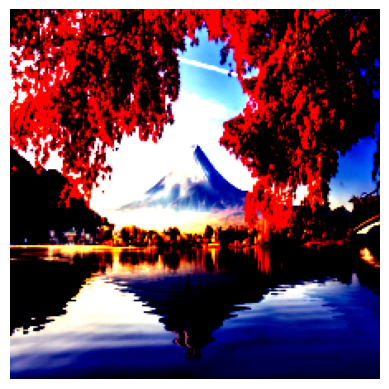

In [59]:
plotting_the_image(after_transformations)

***

###**Custom Padding**

<font color='green'> <b>Padding</b> is used to add additional pixels on the top,bottom, left and right side of the image.

This section also marks the beginning of functional transformations.
 </font> \
***



<font color='blue'> Defining the custom padding class, which takes input as the number of pixels for top, bottom, left and right sides of the image.
 </font> \
***



In [60]:
class padding:
    def __init__(self,pixels):
        self.pixels=pixels

    def __call__(self, x):
        return F.pad(x, self.pixels)



<font color='green'> Calling the custom padding class using padding((30,30,30,30)) along side the other transformations (resizing, tensor conversion and normalizing).
 </font> \
***



In [61]:
data_transforms = T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(),
                             padding((30,30,30,30)), 
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

***Output image:-***

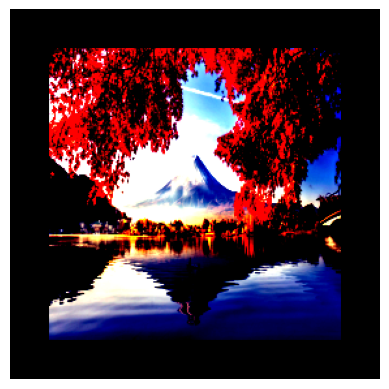

In [62]:
after_transformations=data_transforms(image_sample)
plotting_the_image(after_transformations)

***

###**Gaussian Blur**

<font color='green'> <b>Gaussian Blur</b> is used to blur the image. The kernel size and sigma values are given as inputs. Kernel size defines the size of the gaussian kernel to be used. And the sigma refers to the standard deviation used to create the above kernel.
 </font> \
***



<font color='blue'> Defining the custom blur class, which takes input as the kernel size and the sigma value.
 </font> \
***



In [63]:
class blur:
    def __init__(self,kernel_size,sigma):
        self.kernel_size=kernel_size
        self.sigma=sigma

    def __call__(self, x):
        return F.gaussian_blur(x, self.kernel_size,self.sigma)



In [64]:
data_transforms = T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(),
                             blur(kernel_size=3, sigma=1.3),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

***Output image:-***

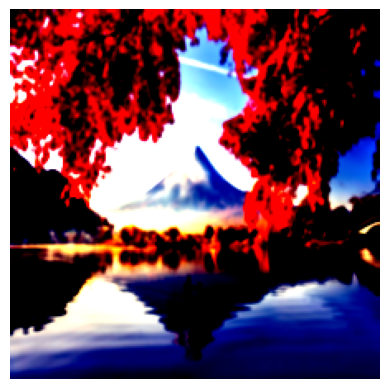

In [65]:
after_transformations=data_transforms(image_sample)
plotting_the_image(after_transformations)

***

###**Custom Rotation**

<font color='green'> <b>Rotation</b> is used to rotate an image at a given angle. In order to achieve custom rotation, a rotation class is defined which takes the angle as an input and employs rotate() function of the functional transformation to rotate the image.
 </font> \
***



<font color='blue'> Defining the custom rotation class, which takes input as the angle of rotation.
 </font> \
***



In [66]:
class Rotation:
    def __init__(self,given_angle):
        self.given_angle=given_angle

    def __call__(self, x):
        return F.rotate(x, self.given_angle)



**a) Rotation by 45 degrees**

In [67]:
data_transforms2 = T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             Rotation(45),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

***Output image:-***

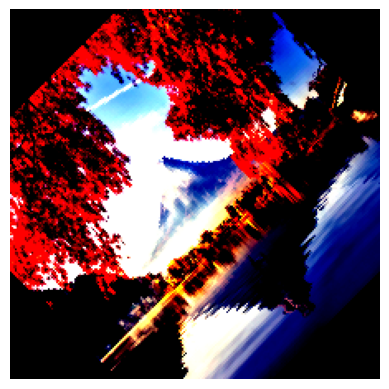

In [68]:
after_transformations=data_transforms2(image_sample)
plotting_the_image(after_transformations)

**b) Rotation by 90 degree**

In [69]:
data_transforms3=T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             Rotation(90),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

In [70]:
after_transformations=data_transforms3(image_sample)

***Output image:-***

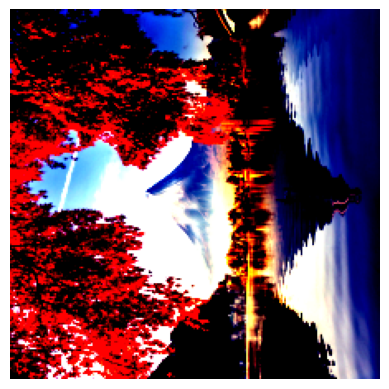

In [71]:
plotting_the_image(after_transformations)

**c) Rotation by 180 degrees**

In [72]:
data_transforms4=T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             Rotation(180),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

In [73]:
after_transformations=data_transforms4(image_sample)

***Output image:-***

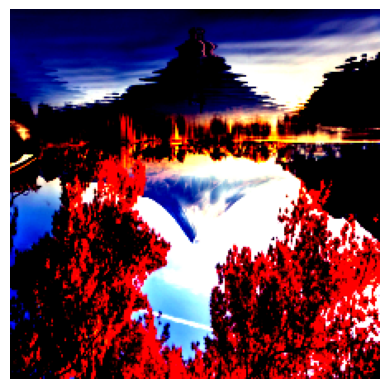

In [74]:
plotting_the_image(after_transformations)

**d) Rotation by 270 degrees**

In [75]:
data_transforms5=T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             Rotation(270),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

In [76]:
after_transformations=data_transforms5(image_sample)

***Output image:-***

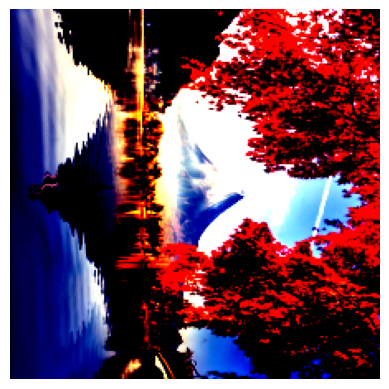

In [77]:
plotting_the_image(after_transformations)

***

###**Horizontal Flip**

<font color='green'> <b>Horizontal Flip</b> is used to flip an image horizontally. To run this method, hflip() function of the functional transformations is used inside the custom horizontal_flip class.
 </font> \
***



In [78]:
class horizontal_flip:
    def __call__(self, x):
        return F.hflip(x)



In [79]:
data_transforms5=T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             horizontal_flip(),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

***Output Image:-***

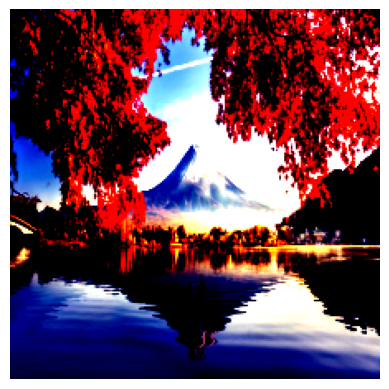

In [80]:
after_transformations=data_transforms5(image_sample)
plotting_the_image(after_transformations)

***

###**Vertical Flip**

<font color='green'> <b>Vertical Flip</b> is used to flip an image vertically. To run this method, vflip() function of the functional transformations is used inside the custom vertical_flip class.
 </font> \
***



In [81]:
class vertical_flip:
    def __call__(self, x):
        return F.vflip(x)



In [82]:
data_transforms5=T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(), 
                             vertical_flip(),
                             T.Normalize(mean=[0.491, 0.482, 0.456], std=[0.202, 0.199, 0.201])])

***Output Image:-***

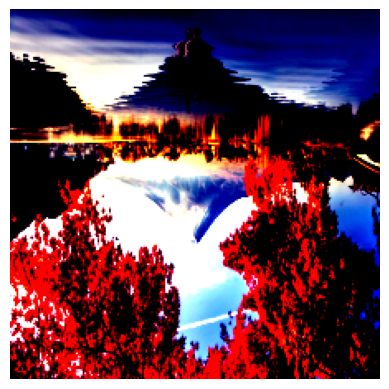

In [83]:
after_transformations=data_transforms5(image_sample)
plotting_the_image(after_transformations)

***

###**Random Augment**

<font color='green'> <b>Random Augment</b> technique randomly augments the image. It automatically applies the augmentation methods. the technique is based on the research paper *RandAugment: Practical Automated Data Augmentation with a Reduced Search Space*
 </font> \
***



In [84]:
data_transforms5=T.Compose([ T.Resize((224, 224)), 
                             T.ToTensor(), 
                             T.RandAugment()
                             ])

***Output Image:-***

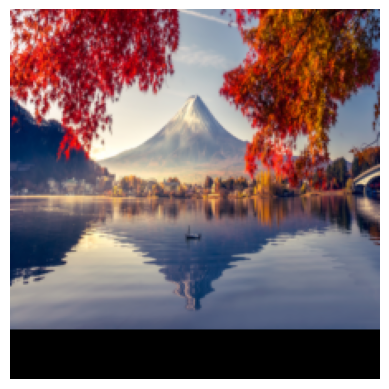

In [85]:
after_transformations=data_transforms5(image_sample)
plotting_the_image(after_transformations)



---



###**Auto Augment**

<font color='green'> <b>Auto Augment</b> technique automatically applies the augmentation methods. The technique is based on the research paper *AutoAugment: Learning Augmentation Strategies from Data.*. For this technique the torch tensor must be of the datatype torch.unit8. The default policy is AutoAugmentPolicy.IMAGENET, and the default interpolation is InterpolationMode.NEAREST.
 </font> \
***



In [86]:
data_transforms6=T.Compose([ T.Resize((224, 224)), 
                             T.ToTensor(), 
                             T.ConvertImageDtype(torch.uint8),
                             T.AutoAugment()
                             ])

***Output Image:-***

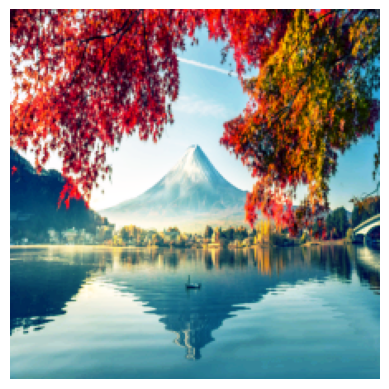

In [87]:
after_transformations=data_transforms6(image_sample)
plotting_the_image(after_transformations)


---


###**Multiple transformations**

 a) Tensor conversion\
 b) Resizing\
 c) Horizontal flip\
 d) Rotate by 90 degrees\
 e) Gaussian noise

<font color='green'> The section demonstrates all of the above augmentation techniques on the input image.
 </font> \
***



In [88]:
data_transforms_multiple=T.Compose([T.Resize((224, 224)), 
                             T.ToTensor(),
                             blur(kernel_size=3, sigma=1.3),
                             horizontal_flip(),
                             Rotation(90)
                             ])

***Output Image:-***

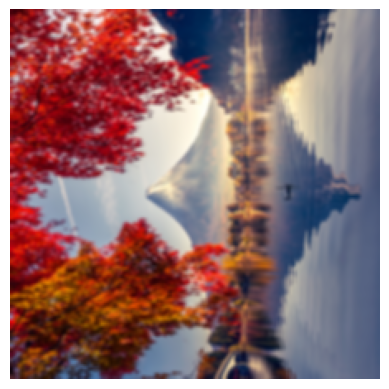

In [89]:
after_transformations=data_transforms_multiple(image_sample)
plotting_the_image(after_transformations)



---



## **References**



1.   https://pytorch.org/vision/stable/transforms.html
2.   E. D. Cubuk, B. Zoph, D. Mané, V. Vasudevan and Q. V. Le, "AutoAugment: Learning Augmentation Strategies From Data," 2019 IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR), Long Beach, CA, USA, 2019, pp. 113-123, doi: 10.1109/CVPR.2019.00020.
3. E. D. Cubuk, B. Zoph, J. Shlens, and Q. V. Le, "RandAugment: Practical automated data augmentation with a reduced search space," in Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR), 2020, pp. 8798-8808.
4. https://www.analyticsvidhya.com/blog/2021/03/image-augmentation-techniques-for-training-deep-learning-models/
5. https://www.picsellia.com/post/image-data-augmentation




